In [3]:
import pandas as pd

dia_data=pd.read_csv('D:\桌面\diabetes.csv')
dia_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dia_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


因为没有缺失值，所以只对异常值进行处理 ①采用中位数对0值处的位置进行处理（除Pregnancies）

In [5]:
median_Glucose = dia_data.loc[(dia_data['Glucose']  ),'Glucose'].median()    #将这一列中不为0的值算出的中位数赋值给为0的位置
median_BloodPressure = dia_data.loc[(dia_data['BloodPressure']),'BloodPressure'].median()
median_SkinThickness = dia_data.loc[(dia_data['SkinThickness']!=0),'SkinThickness'].median()
median_Insulin = dia_data.loc[(dia_data['Insulin'] !=0 ),'Insulin'].median()
median_BMI = dia_data.loc[(dia_data['BMI']!=0),'BMI'].median()
# print(median_Glucose)
# print(median_BloodPressure)
# print(median_Insulin)
dia_data.loc[(dia_data['Glucose']==0),'Glucose'] = median_Glucose 
dia_data.loc[(dia_data['BloodPressure']==0),'BloodPressure'] = median_BloodPressure
dia_data.loc[(dia_data['SkinThickness']==0),'SkinThickness'] = median_SkinThickness
dia_data.loc[(dia_data['Insulin']==0),'Insulin'] = median_Insulin 
dia_data.loc[(dia_data['BMI']==0),'BMI'] = median_BMI 

In [6]:
dia_data.loc[(dia_data['Glucose']==0)|
            (dia_data['BloodPressure']==0)|
            (dia_data['SkinThickness']==0)|
            (dia_data['Insulin']==0)|
            (dia_data['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
dia_data.to_csv('D:桌面\diabetes_clean.csv', index=False)

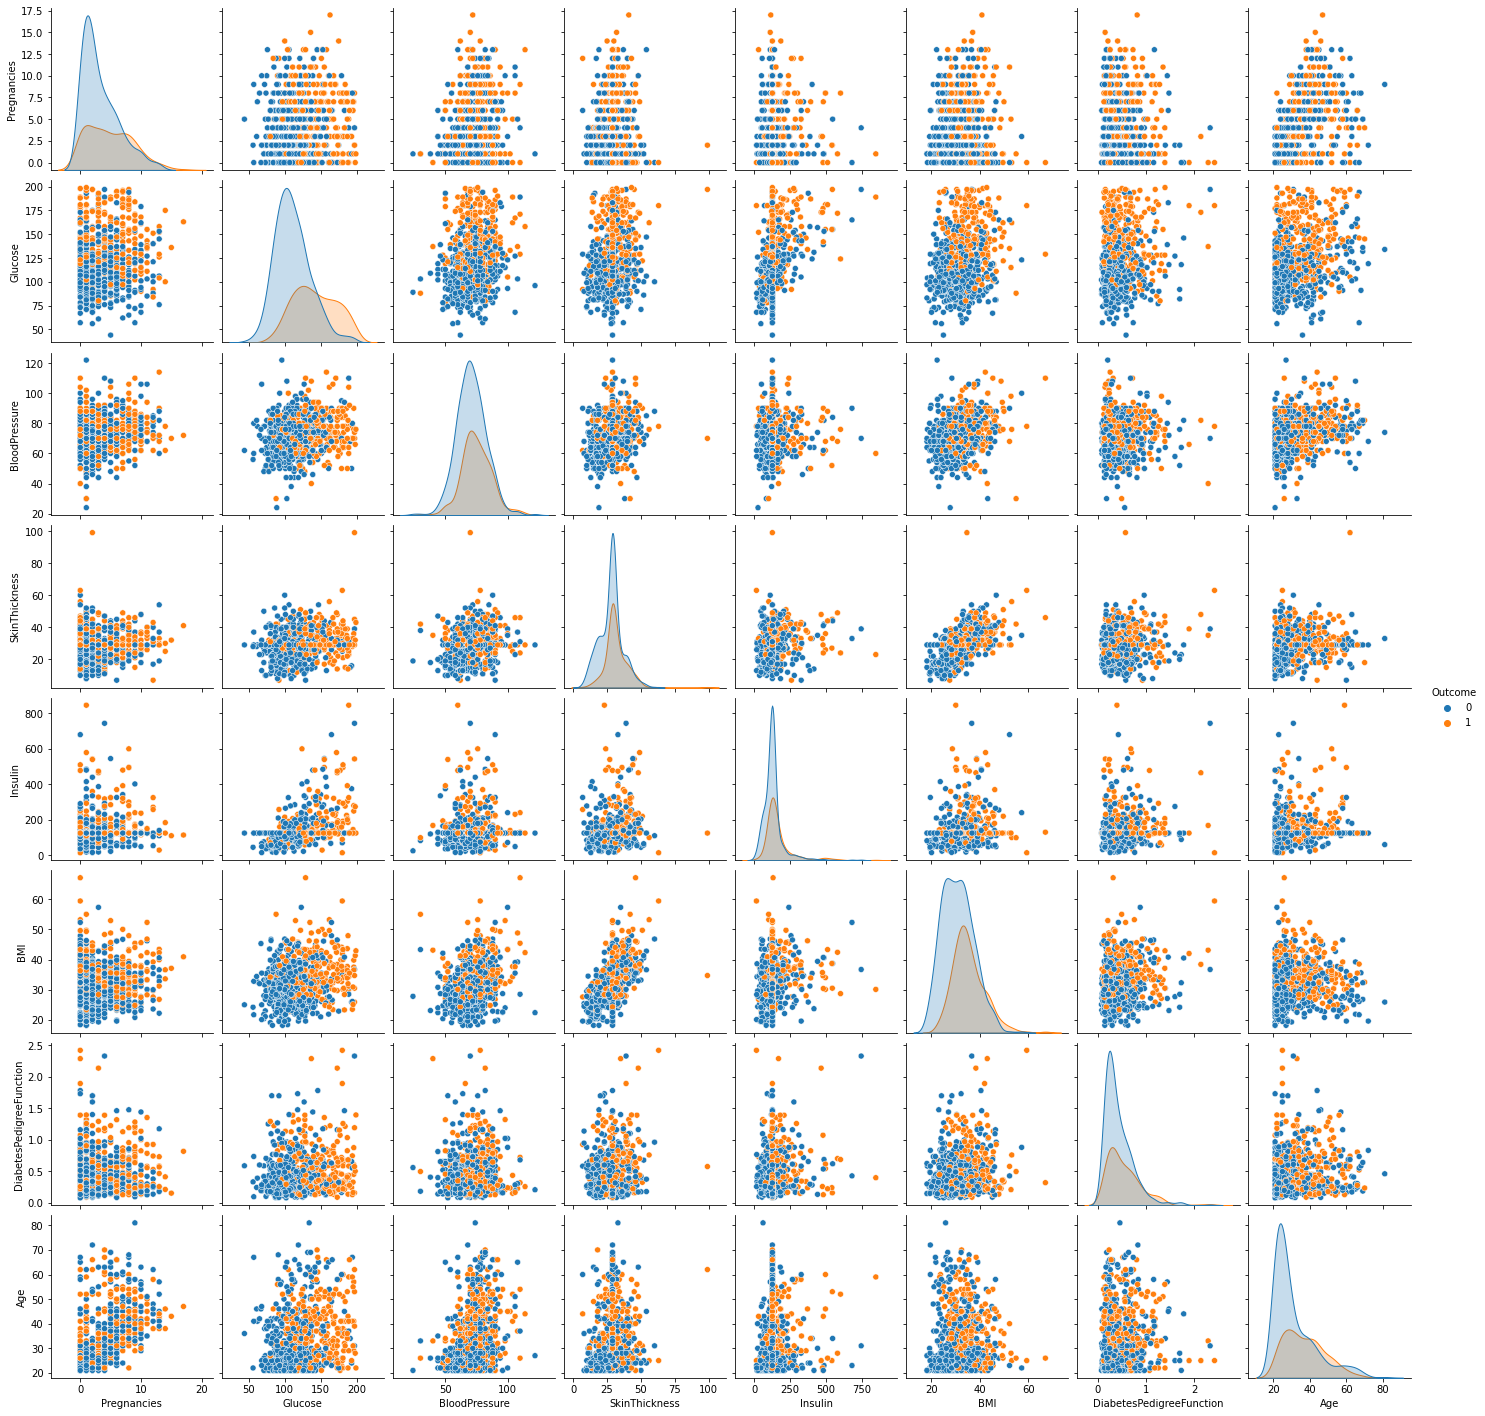

In [10]:
import seaborn as sb

dia_data_clean = pd.read_csv('D:桌面\diabetes_clean.csv')

sb.pairplot(dia_data_clean, hue='Outcome')

In [145]:
from sklearn.preprocessing import StandardScaler
for column_index, column in enumerate(dia_data_clean.keys()):
    if column == 'Outcome':
        continue
    col_to_normalize = dia_data_clean[column]
    # print(type(col_to_normalize))     <class 'pandas.core.series.Series'>
    scaler = StandardScaler()
    normalized_col = scaler.fit_transform(col_to_normalize.values.reshape(-1,1))
    dia_data_clean[column] = normalized_col
    
#   归一化的另一种做法
#     sc_X = StandardScaler()
# X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
#         columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'])
    
dia_data_clean.to_csv('D:桌面\diabetes_normalized.csv', index= False)

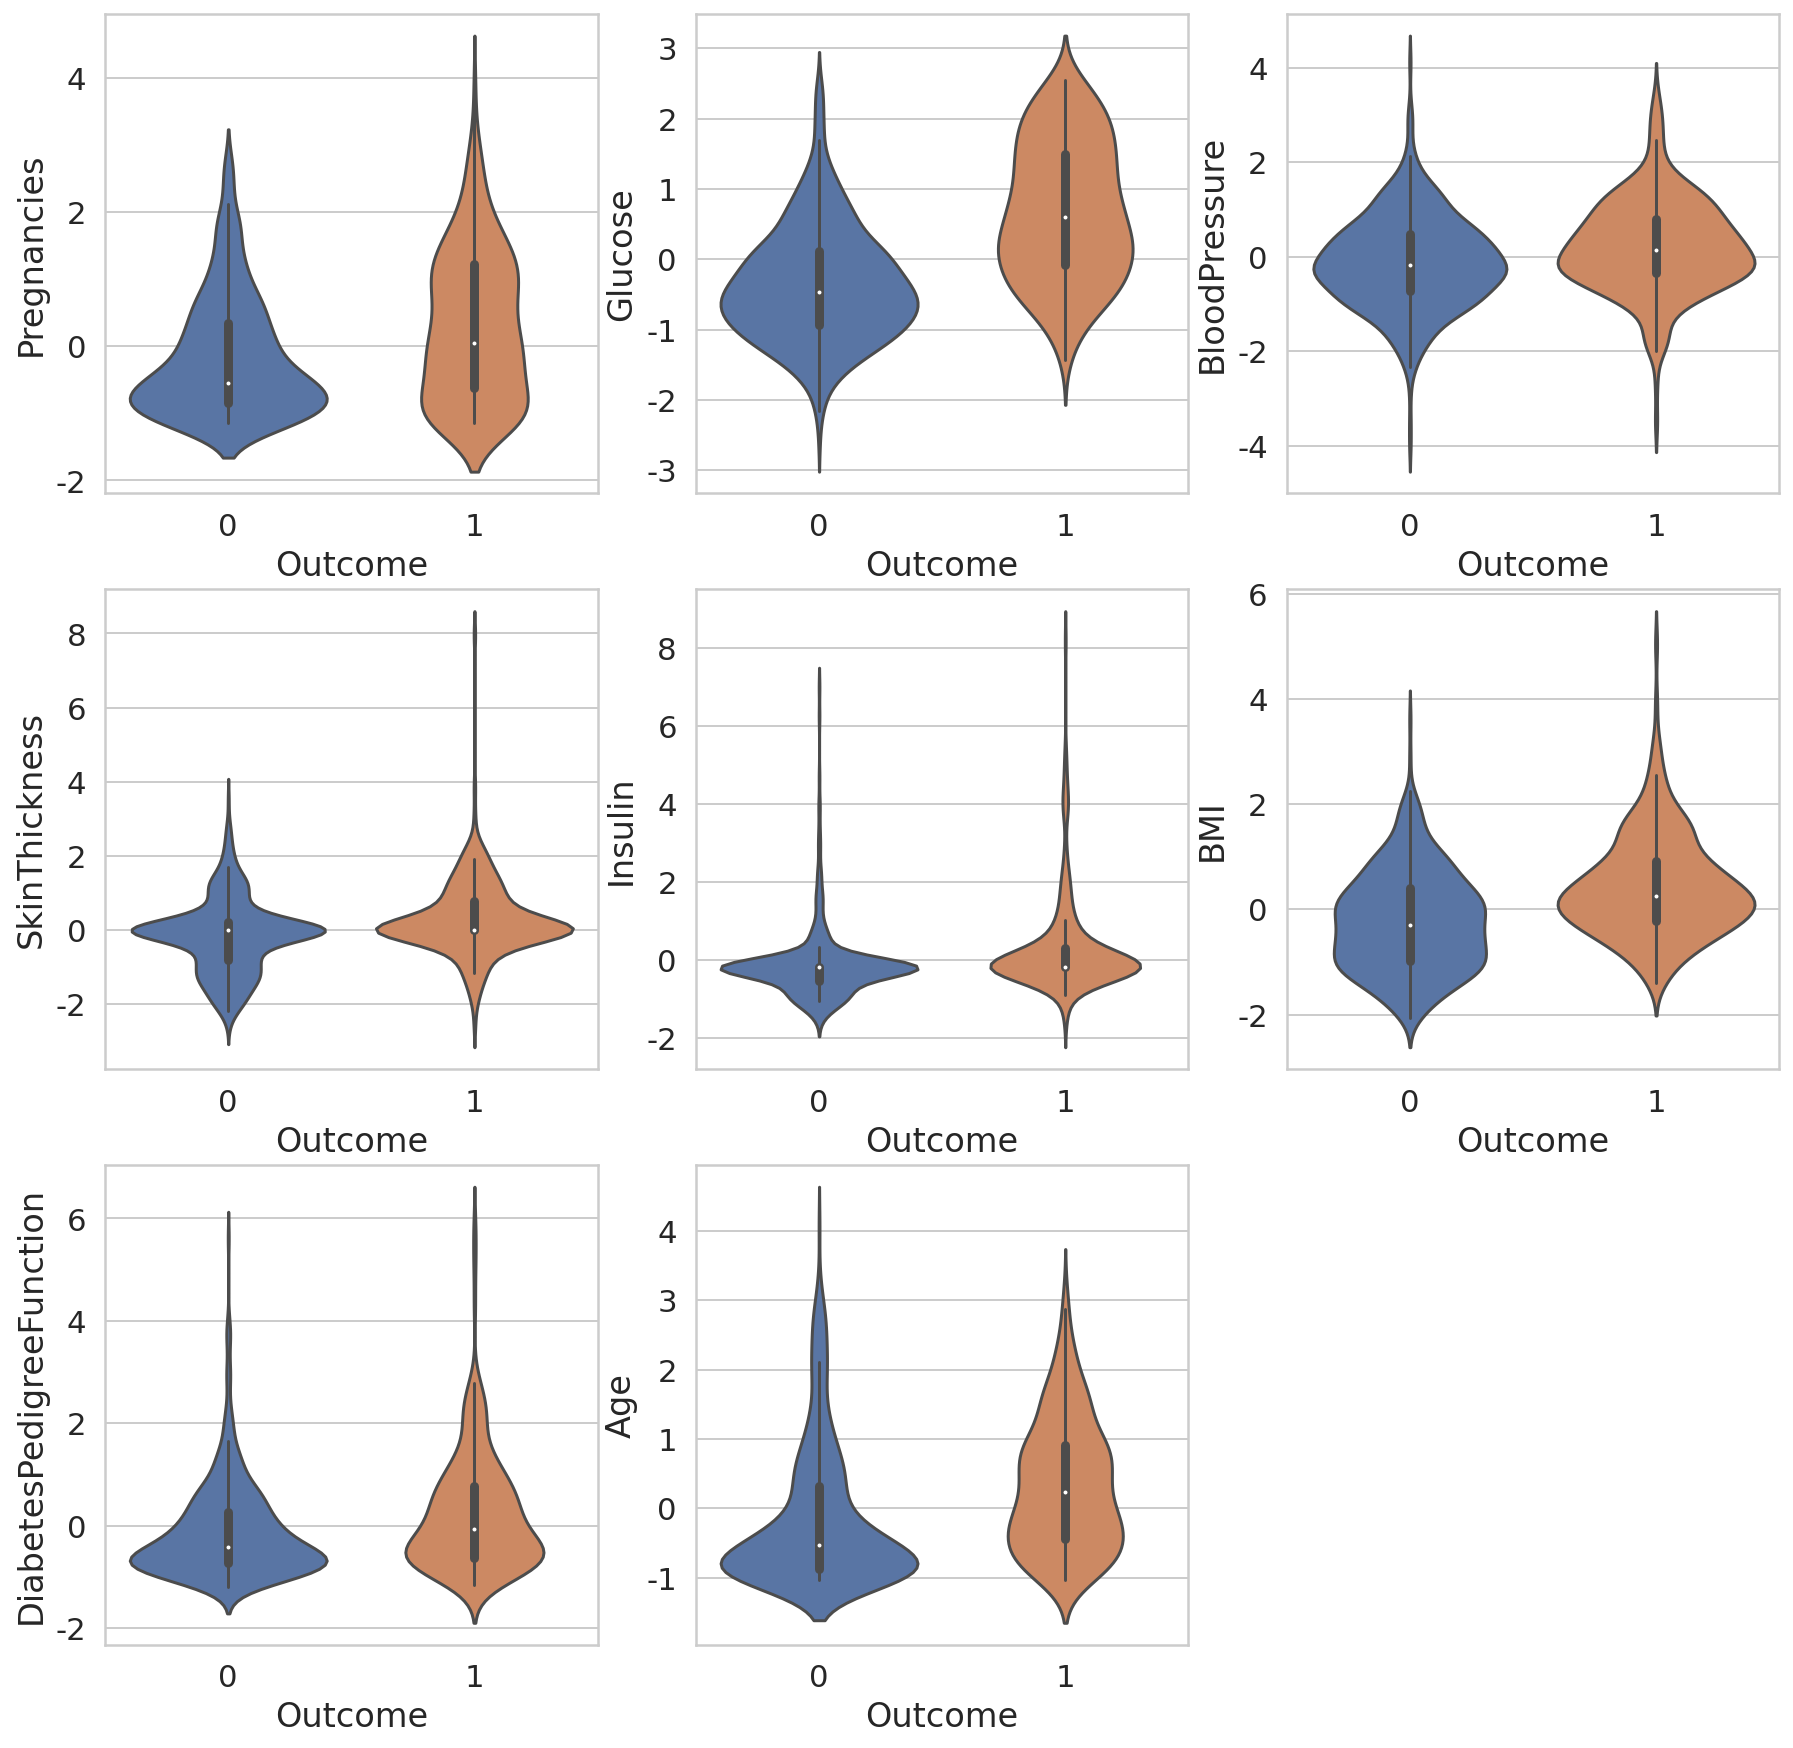

In [146]:
#小提琴图
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

for column_index, column in enumerate(dia_data.keys()):
    if column == 'Outcome':
        continue
    plt.subplot(3,3,column_index+1)
    sb.violinplot(x='Outcome', y=column, data=dia_data_clean)

In [14]:
## 设置图像显示情况
%config InlineBackend.figure_format = "retina"
%matplotlib inline    
import seaborn as sns  ## 设置中文字体显示  但是没有作用
sns.set(font= "Arial Unicode MS",style="whitegrid",font_scale=1.4)
import matplotlib  ## 解决坐标轴的负号显示问题
matplotlib.rcParams['axes.unicode_minus']=False 

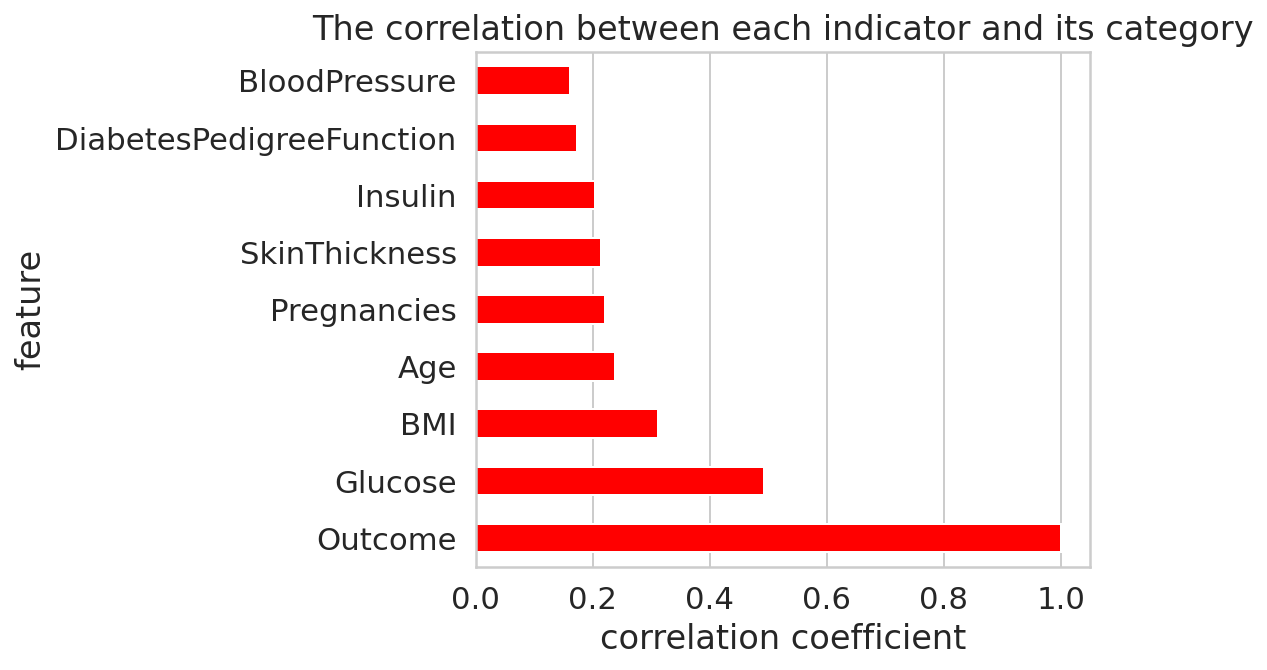

In [147]:

correlations = dia_data_clean.corrwith(dia_data_clean['Outcome']).dropna().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
correlations.plot(kind='barh', color='red')
plt.title('The correlation between each indicator and its category')  #各指标和所属类别间的相关性
plt.xlabel('correlation coefficient')  #相关系数
plt.ylabel('feature')    #特征
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [148]:
basic_info = dia_data_clean.columns[0:8]

In [149]:
## 可视化特征相关系数热力图
import plotly.express as px

## 计算数据的相关系数矩阵
corr = dia_data_clean[basic_info].corr()
fig = px.imshow(corr,width=1000,height=1000,
                ## 设置图像的填充颜色
                color_continuous_scale = px.colors.sequential.Viridis)
fig.update_layout(title={"x":0.5,"y":0.95})
fig.show()

In [150]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

dia_data = pd.read_csv('D:桌面\diabetes_normalized.csv')
dia_data_clean = pd.read_csv('D:桌面\diabetes_clean.csv')

X = dia_data.drop('Outcome', axis = 1)
y = dia_data_clean['Outcome']
# print(y.unique())
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0) #stratify=y 

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
# print(logistic_model.coef_)

accuracy_train = logistic_model.score(X_train, y_train)

accuracy_test = logistic_model.score(X_test, y_test)
print("Logistic Regression模型在训练集上的准确率为：", accuracy_train)
print("Logistic Regression模型在测试集上的准确率为：", accuracy_test)

Logistic Regression模型在训练集上的准确率为： 0.7699386503067485
Logistic Regression模型在测试集上的准确率为： 0.8275862068965517


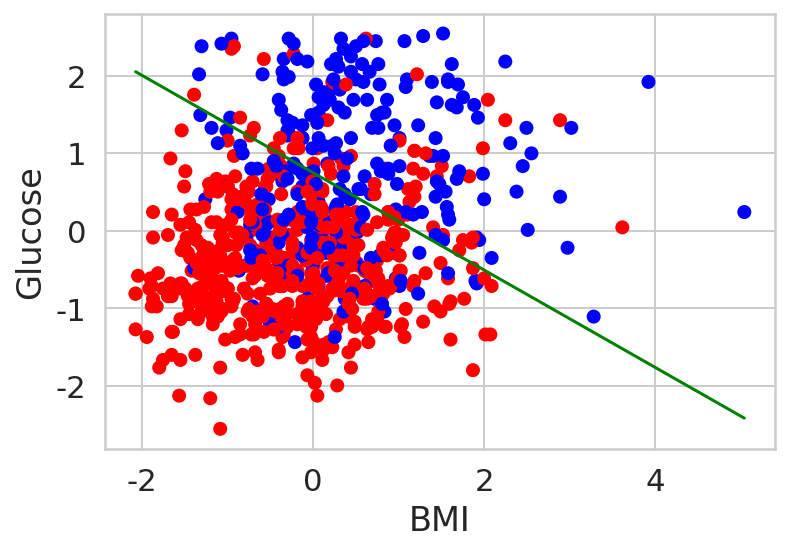

In [144]:
from matplotlib.colors import ListedColormap
#获取BMI与Glucose两个特征的数值
X_1, X_2 = X['BMI'], X['Glucose']   
#转换成np数组
X_1, X_2 = X['BMI'].values, X['Glucose'].values
y_values = y.values

#设置边界决策线
x_boundary = np.linspace(min(X_1), max(X_1), 100)
y_boundary = (-logistic_model.intercept_ - logistic_model.coef_[0][5] * x_boundary) /logistic_model.coef_[0][1]

cmap = ListedColormap(['red','blue'])
#数据散点图
plt.scatter(X_1, X_2, c=y_values, cmap = cmap)  
#边界决策线
plt.plot(x_boundary, y_boundary, color='green')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()